In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-ml-w5p2/trainX.csv
/kaggle/input/2024-ml-w5p2/testX.csv
/kaggle/input/2024-ml-w5p2/trainY.csv
/kaggle/input/2024-ml-w5p2/submit.csv


In [47]:
#랜덤시드 고정
import random
import os
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

In [48]:
#Iris 데이터 불러오기
import seaborn as sns
iris = sns.load_dataset('iris')

In [49]:
x = iris.drop('species', axis = 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(iris['species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
#데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=seed, stratify=y)

In [51]:
#LDA 학습
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

#lda 학습
x_lda = lda.fit_transform(x_train, y_train)

#예측
y_train_pred = lda.predict(x_train)
y_test_pred = lda.predict(x_test)

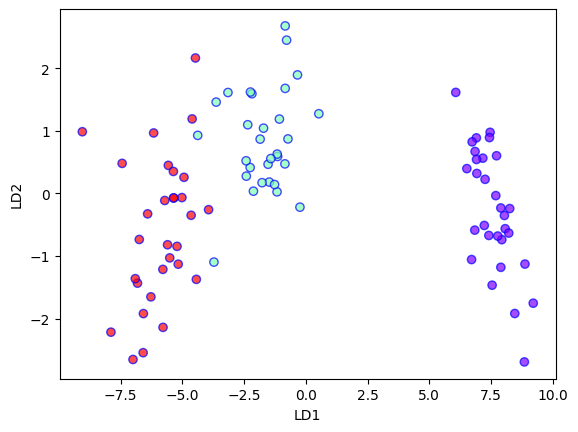

In [52]:
#데이터 그리기
from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    x_lda[:,0],
    x_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [53]:
#분류 성능
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

0.9666666666666667
0.9833333333333333
[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]


In [54]:
#QDA 학습
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True) #covariance저장
qda.fit(x_train, y_train)

#예측
y_train_pred = qda.predict(x_train)
y_test_pred = qda.predict(x_test)


In [55]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))

0.9777777777777777
0.9833333333333333
[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]


In [56]:
print(qda.means_)
print(qda.covariance_)

[[4.98666667 3.43666667 1.48666667 0.24      ]
 [5.97       2.74       4.27       1.31333333]
 [6.64666667 3.01666667 5.62333333 2.05666667]]
[array([[0.11085057, 0.12050575, 0.01533333, 0.01434483],
       [0.12050575, 0.19895402, 0.01843678, 0.01227586],
       [0.01533333, 0.01843678, 0.02533333, 0.00434483],
       [0.01434483, 0.01227586, 0.00434483, 0.01006897]]), array([[0.26010345, 0.0802069 , 0.16182759, 0.04868966],
       [0.0802069 , 0.09144828, 0.06262069, 0.03186207],
       [0.16182759, 0.06262069, 0.19734483, 0.06524138],
       [0.04868966, 0.03186207, 0.06524138, 0.03567816]]), array([[0.46464368, 0.12816092, 0.34266667, 0.03829885],
       [0.12816092, 0.13385057, 0.10649425, 0.04385057],
       [0.34266667, 0.10649425, 0.32254023, 0.05552874],
       [0.03829885, 0.04385057, 0.05552874, 0.06598851]])]
